# Capston project- Churn pediction and retention strategy for a telecom provider

## import statements

In [3]:
import pandas as pd
import numpy as np
#for graphical rrepresentation
import matplotlib.pyplot as plt
import seaborn as sns
#To avoid warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


#Performance Evaluation
def EvaluateClassifier(actual,pred,confusion_matrix_plot=False):

  if confusion_matrix_plot==True:
    sns.heatmap(confusion_matrix(actual,pred),annot=True,fmt="d")
    plt.show()

  print(classification_report(actual,pred))

In [4]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,customer_id,gender,age,region_circle,connection_type,plan_type,contract_type,base_plan_category,tenure_months,monthly_charges,...,auto_pay_enrolled,late_payment_flag_3m,avg_payment_delay_days,arpu,segment_value,nps_score,service_rating_last_6m,received_competitor_offer_flag,retention_offer_accepted_flag,is_churn
0,100000,Female,23,West,4G,Postpaid,2 Year,Postpaid Platinum,84,1133.57,...,0,0,0.4,1133.57,High,13.0,3.2,0,0,0
1,100001,Male,72,West,4G,Prepaid,No Contract,Prepaid Unlimited,32,683.24,...,0,1,5.4,688.54,Medium,41.0,3.6,0,0,0
2,100002,Female,47,South,4G,Prepaid,No Contract,Prepaid Regular,119,307.04,...,1,0,0.0,307.05,Low,53.0,5.0,0,0,0
3,100003,Female,74,West,4G,Prepaid,No Contract,Prepaid Mini,73,213.82,...,1,0,0.0,214.89,Low,20.0,4.5,1,1,0
4,100004,Male,41,South,5G,Prepaid,No Contract,Prepaid Regular,92,383.17,...,0,0,0.5,383.99,Low,17.0,2.6,0,0,0


## Data Understanding & Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     25000 non-null  int64  
 1   gender                          25000 non-null  object 
 2   age                             25000 non-null  int64  
 3   region_circle                   25000 non-null  object 
 4   connection_type                 25000 non-null  object 
 5   plan_type                       25000 non-null  object 
 6   contract_type                   25000 non-null  object 
 7   base_plan_category              25000 non-null  object 
 8   tenure_months                   25000 non-null  int64  
 9   monthly_charges                 25000 non-null  float64
 10  total_charges                   25000 non-null  float64
 11  avg_data_gb_month               25000 non-null  float64
 12  avg_voice_mins_month            

In [6]:
df.isna().sum()

customer_id                       0
gender                            0
age                               0
region_circle                     0
connection_type                   0
plan_type                         0
contract_type                     0
base_plan_category                0
tenure_months                     0
monthly_charges                   0
total_charges                     0
avg_data_gb_month                 0
avg_voice_mins_month              0
sms_count_month                   0
overage_charges                   0
is_family_plan                    0
is_multi_service                  0
network_issues_3m                 0
dropped_call_rate                 0
avg_data_speed_mbps               0
num_complaints_3m                 0
num_complaints_12m                0
call_center_interactions_3m       0
last_complaint_resolution_days    0
app_logins_30d                    0
selfcare_transactions_30d         0
auto_pay_enrolled                 0
late_payment_flag_3m        

In [7]:
# no missing value - as every column has all 25000 entries 
# checking how many different unique values are there 
for c in df:
    print(c,"-",df[c].nunique())

customer_id - 25000
gender - 3
age - 57
region_circle - 5
connection_type - 3
plan_type - 2
contract_type - 4
base_plan_category - 6
tenure_months - 119
monthly_charges - 20699
total_charges - 24939
avg_data_gb_month - 4545
avg_voice_mins_month - 1298
sms_count_month - 156
overage_charges - 10781
is_family_plan - 2
is_multi_service - 2
network_issues_3m - 10
dropped_call_rate - 22725
avg_data_speed_mbps - 24935
num_complaints_3m - 5
num_complaints_12m - 7
call_center_interactions_3m - 8
last_complaint_resolution_days - 96
app_logins_30d - 23
selfcare_transactions_30d - 10
auto_pay_enrolled - 2
late_payment_flag_3m - 2
avg_payment_delay_days - 103
arpu - 20708
segment_value - 3
nps_score - 168
service_rating_last_6m - 41
received_competitor_offer_flag - 2
retention_offer_accepted_flag - 2
is_churn - 2


In [8]:
df.duplicated().sum()
# No duplicates

np.int64(0)

In [9]:
df.columns

Index(['customer_id', 'gender', 'age', 'region_circle', 'connection_type',
       'plan_type', 'contract_type', 'base_plan_category', 'tenure_months',
       'monthly_charges', 'total_charges', 'avg_data_gb_month',
       'avg_voice_mins_month', 'sms_count_month', 'overage_charges',
       'is_family_plan', 'is_multi_service', 'network_issues_3m',
       'dropped_call_rate', 'avg_data_speed_mbps', 'num_complaints_3m',
       'num_complaints_12m', 'call_center_interactions_3m',
       'last_complaint_resolution_days', 'app_logins_30d',
       'selfcare_transactions_30d', 'auto_pay_enrolled',
       'late_payment_flag_3m', 'avg_payment_delay_days', 'arpu',
       'segment_value', 'nps_score', 'service_rating_last_6m',
       'received_competitor_offer_flag', 'retention_offer_accepted_flag',
       'is_churn'],
      dtype='object')

In [10]:
df['gender'].value_counts()

gender
Female    12070
Male      11940
Other       990
Name: count, dtype: int64

In [11]:
#Churn distribution
print("Churn distribution")
df['is_churn'].value_counts(normalize=True)*100


Churn distribution


is_churn
0    58.572
1    41.428
Name: proportion, dtype: float64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,25000.0,112499.500000,7217.022701,100000.00,106249.750000,112499.500000,118749.250000,124999.000000
age,25000.0,45.960200,16.401422,18.00,32.000000,46.000000,60.000000,74.000000
tenure_months,25000.0,60.149600,34.374772,1.00,31.000000,60.000000,90.000000,119.000000
monthly_charges,25000.0,475.518315,267.550787,99.00,300.607500,385.735000,601.250000,1603.490000
total_charges,25000.0,27230.695507,23717.163861,159.03,10310.812500,20840.650000,36884.147500,177878.030000
avg_data_gb_month,25000.0,25.107675,9.907997,0.50,18.390000,25.100000,31.820000,71.800000
avg_voice_mins_month,25000.0,602.187920,247.929808,30.00,432.000000,603.000000,770.250000,1848.000000
sms_count_month,25000.0,50.652920,28.547638,0.00,30.000000,50.000000,70.000000,173.000000
overage_charges,25000.0,55.209308,43.627134,0.00,23.517500,50.790000,79.060000,451.590000
is_family_plan,25000.0,0.248720,0.432280,0.00,0.000000,0.000000,0.000000,1.000000


## Exploratory Data Analysis (EDA)

In [13]:
df_copy=df
df=df.drop(columns=['customer_id'])
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
numerical_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()

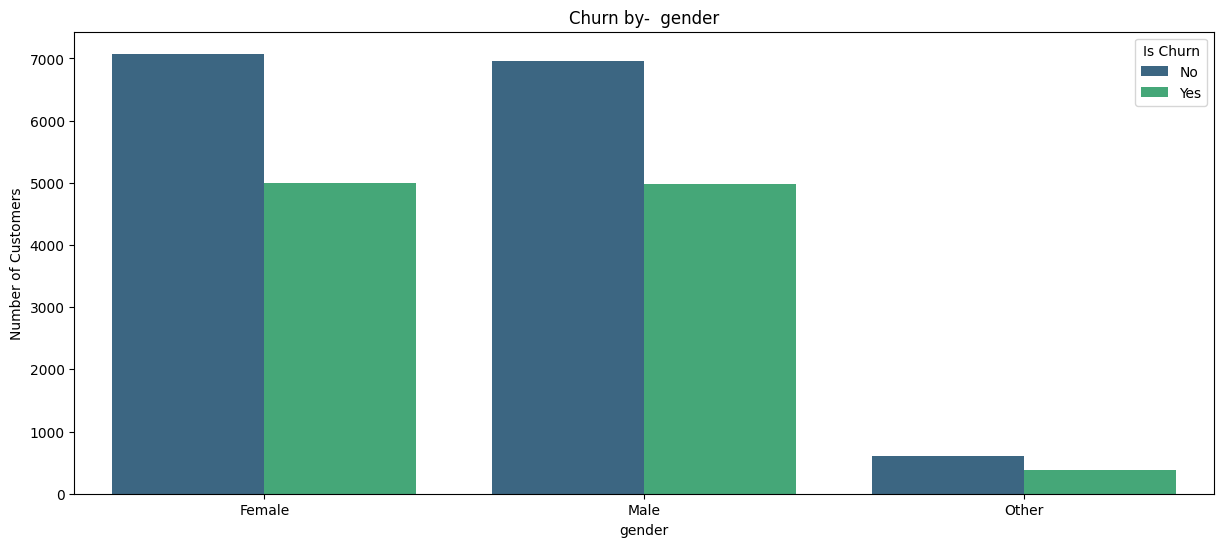

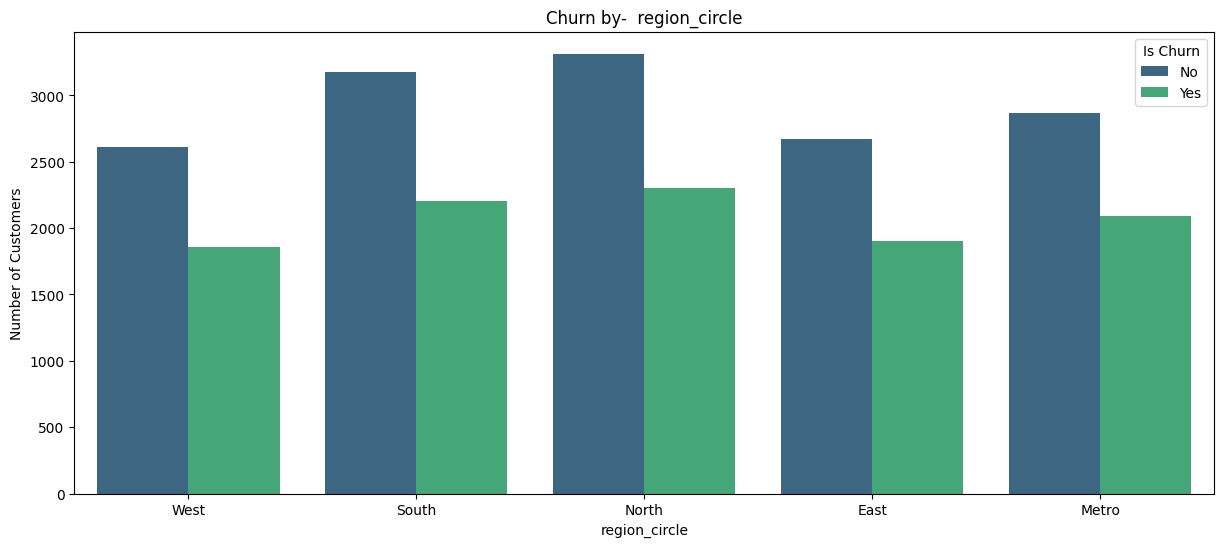

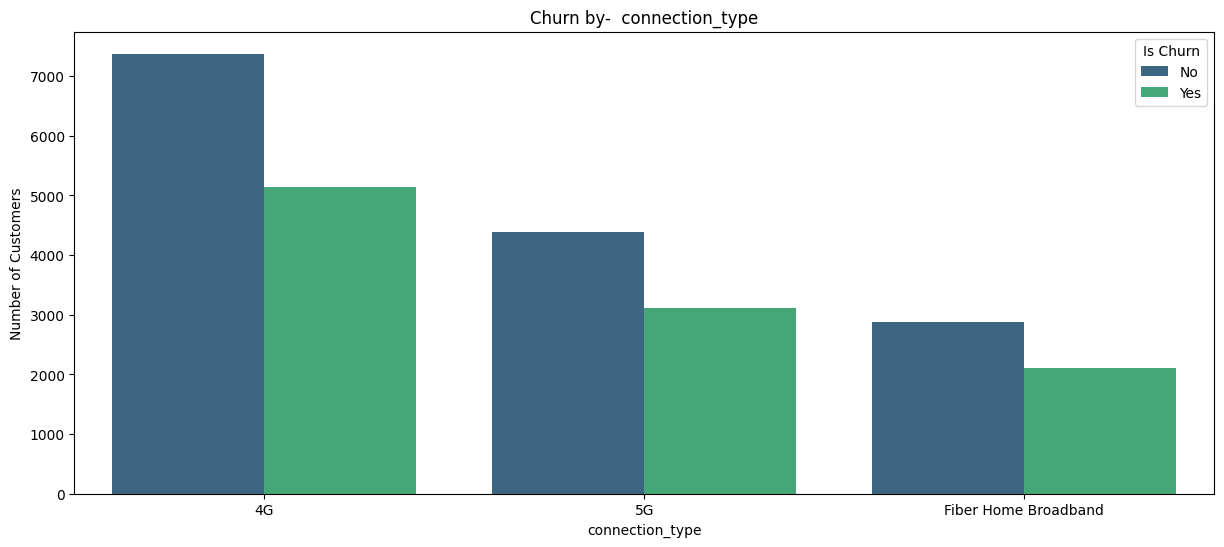

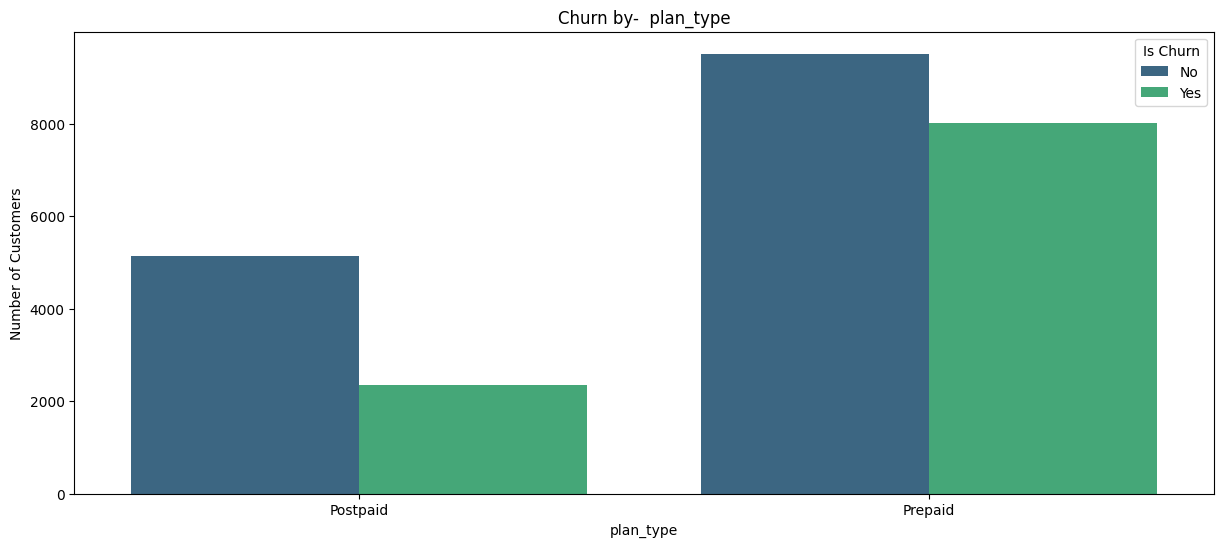

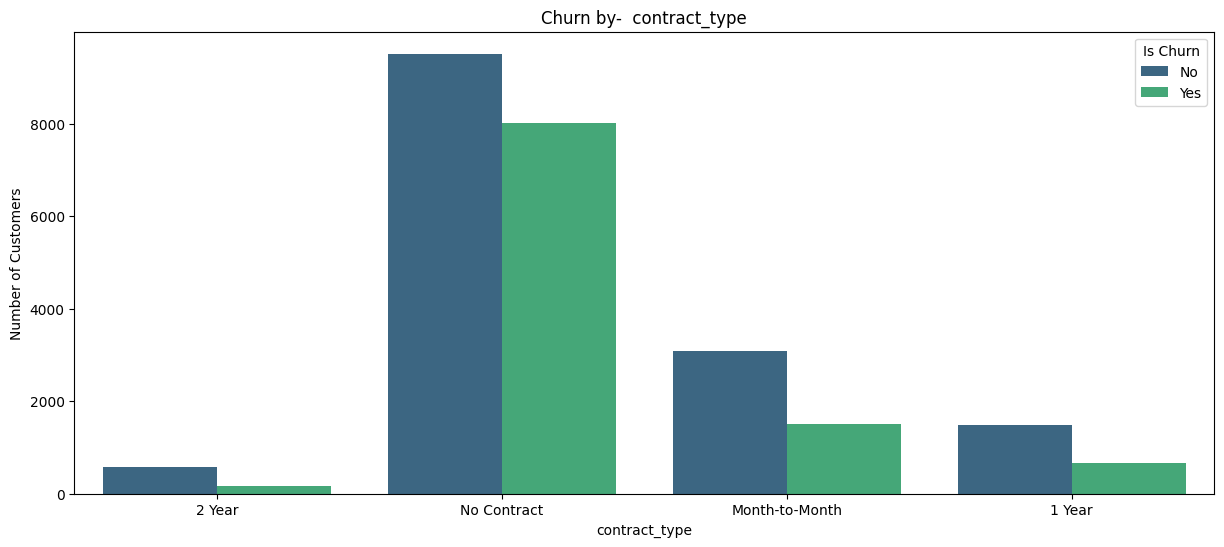

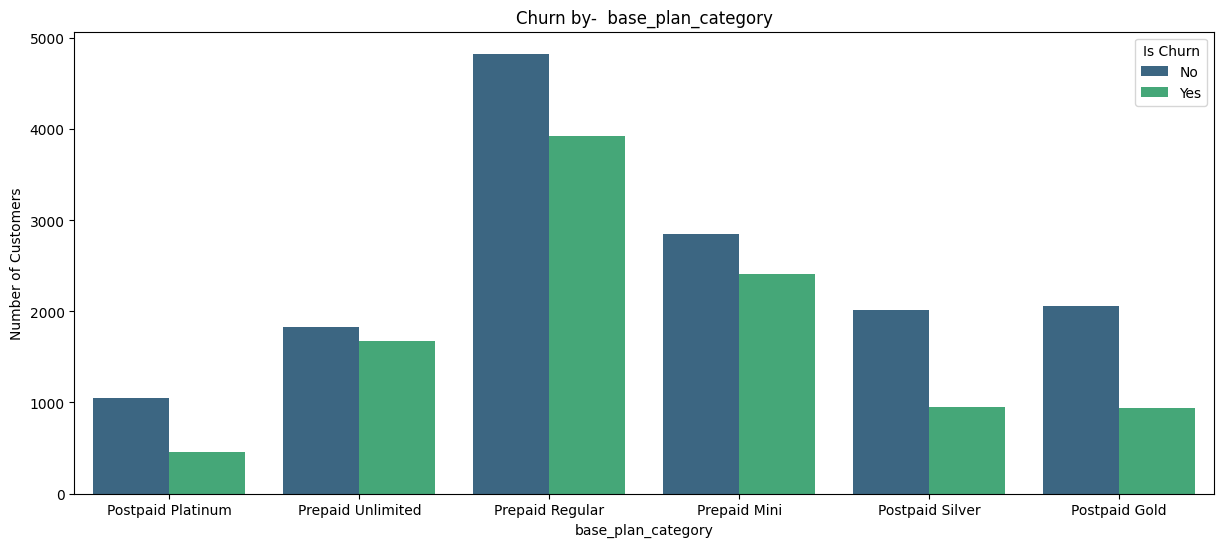

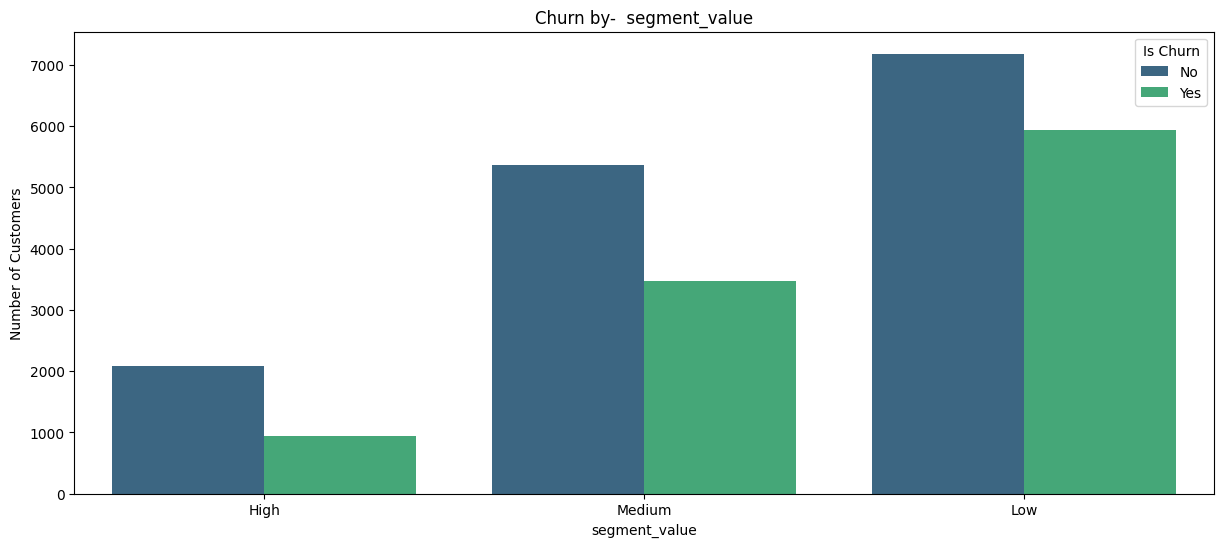

In [14]:
# bar plot for categorical columns

for col in categorical_cols:
    plt.figure(figsize=(50, 6))
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x=col, hue='is_churn', palette='viridis')
    plt.title('Churn by-  '+col)
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend(title='Is Churn', labels=['No', 'Yes'])

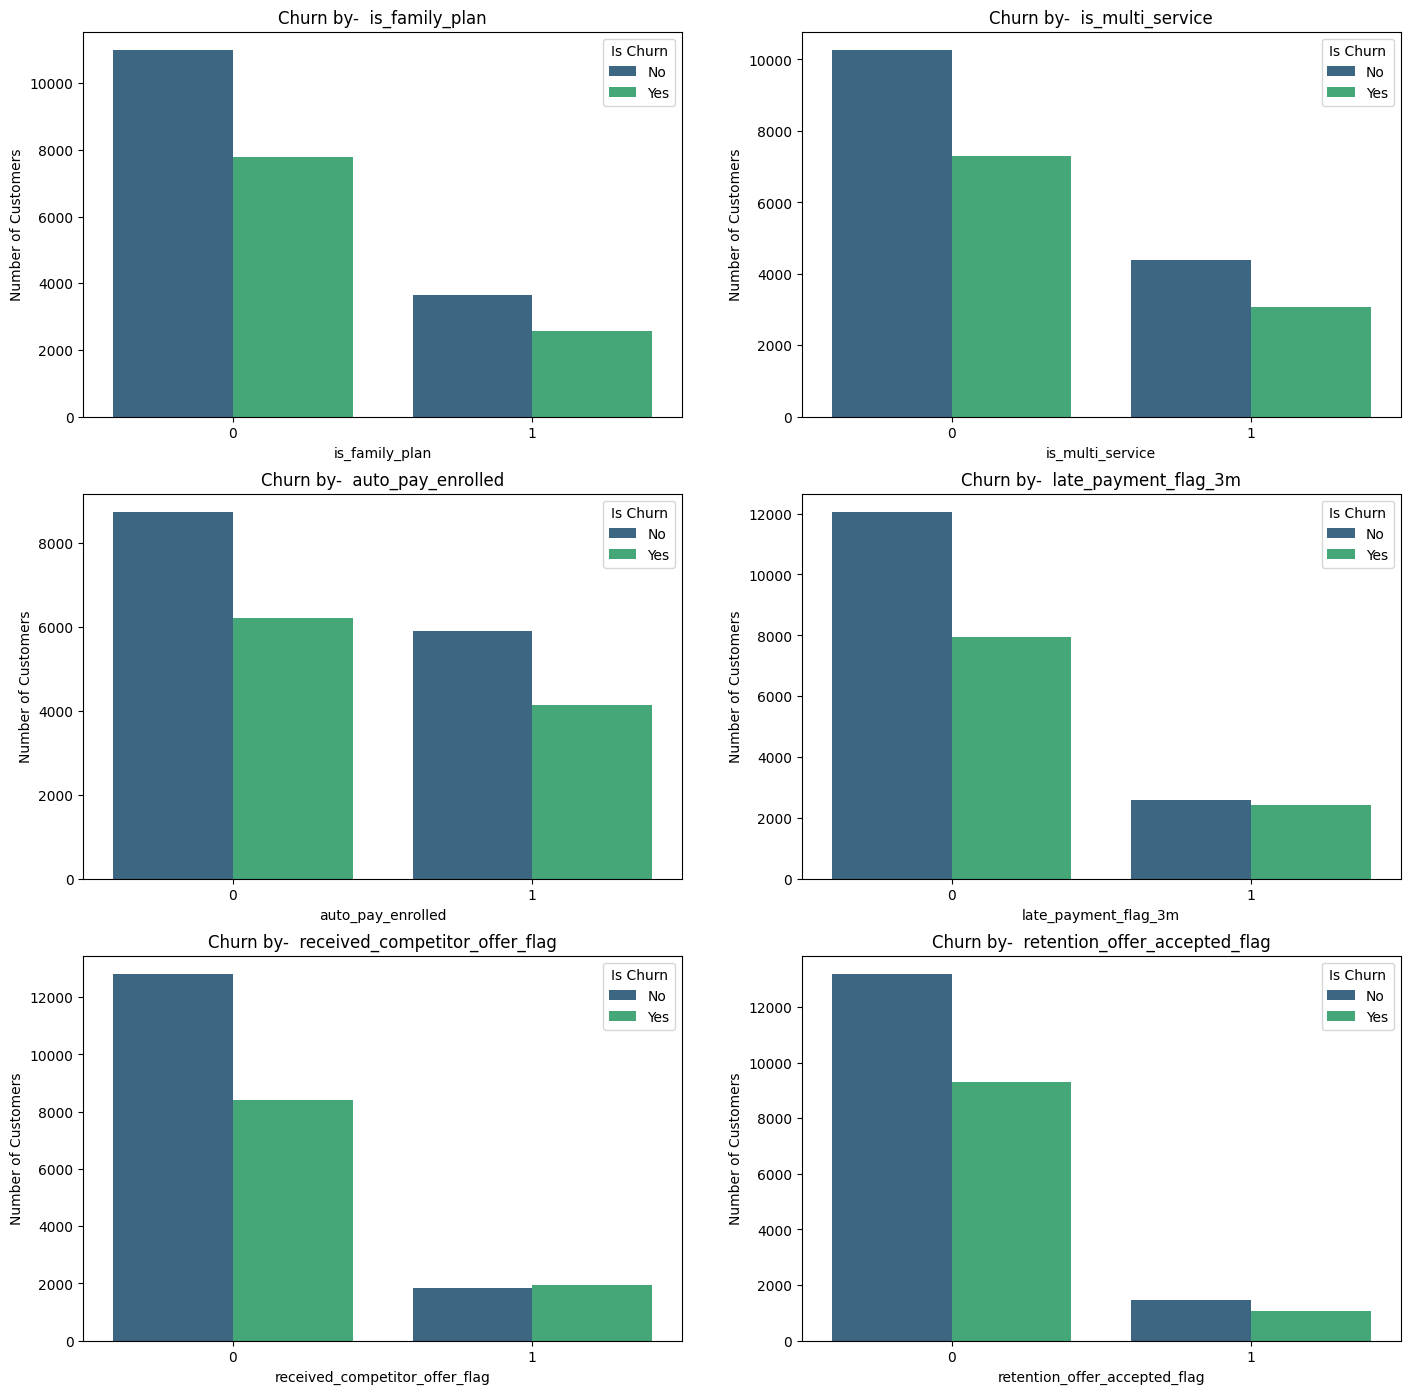

In [15]:
#graphs For binary data

Binar=['is_family_plan','is_multi_service','auto_pay_enrolled','late_payment_flag_3m','received_competitor_offer_flag','retention_offer_accepted_flag']
plt.figure(figsize=(17, 17))

for i, col in enumerate(Binar, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='is_churn', palette='viridis')
    plt.title('Churn by-  '+col)
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.legend(title='Is Churn', labels=['No', 'Yes'])


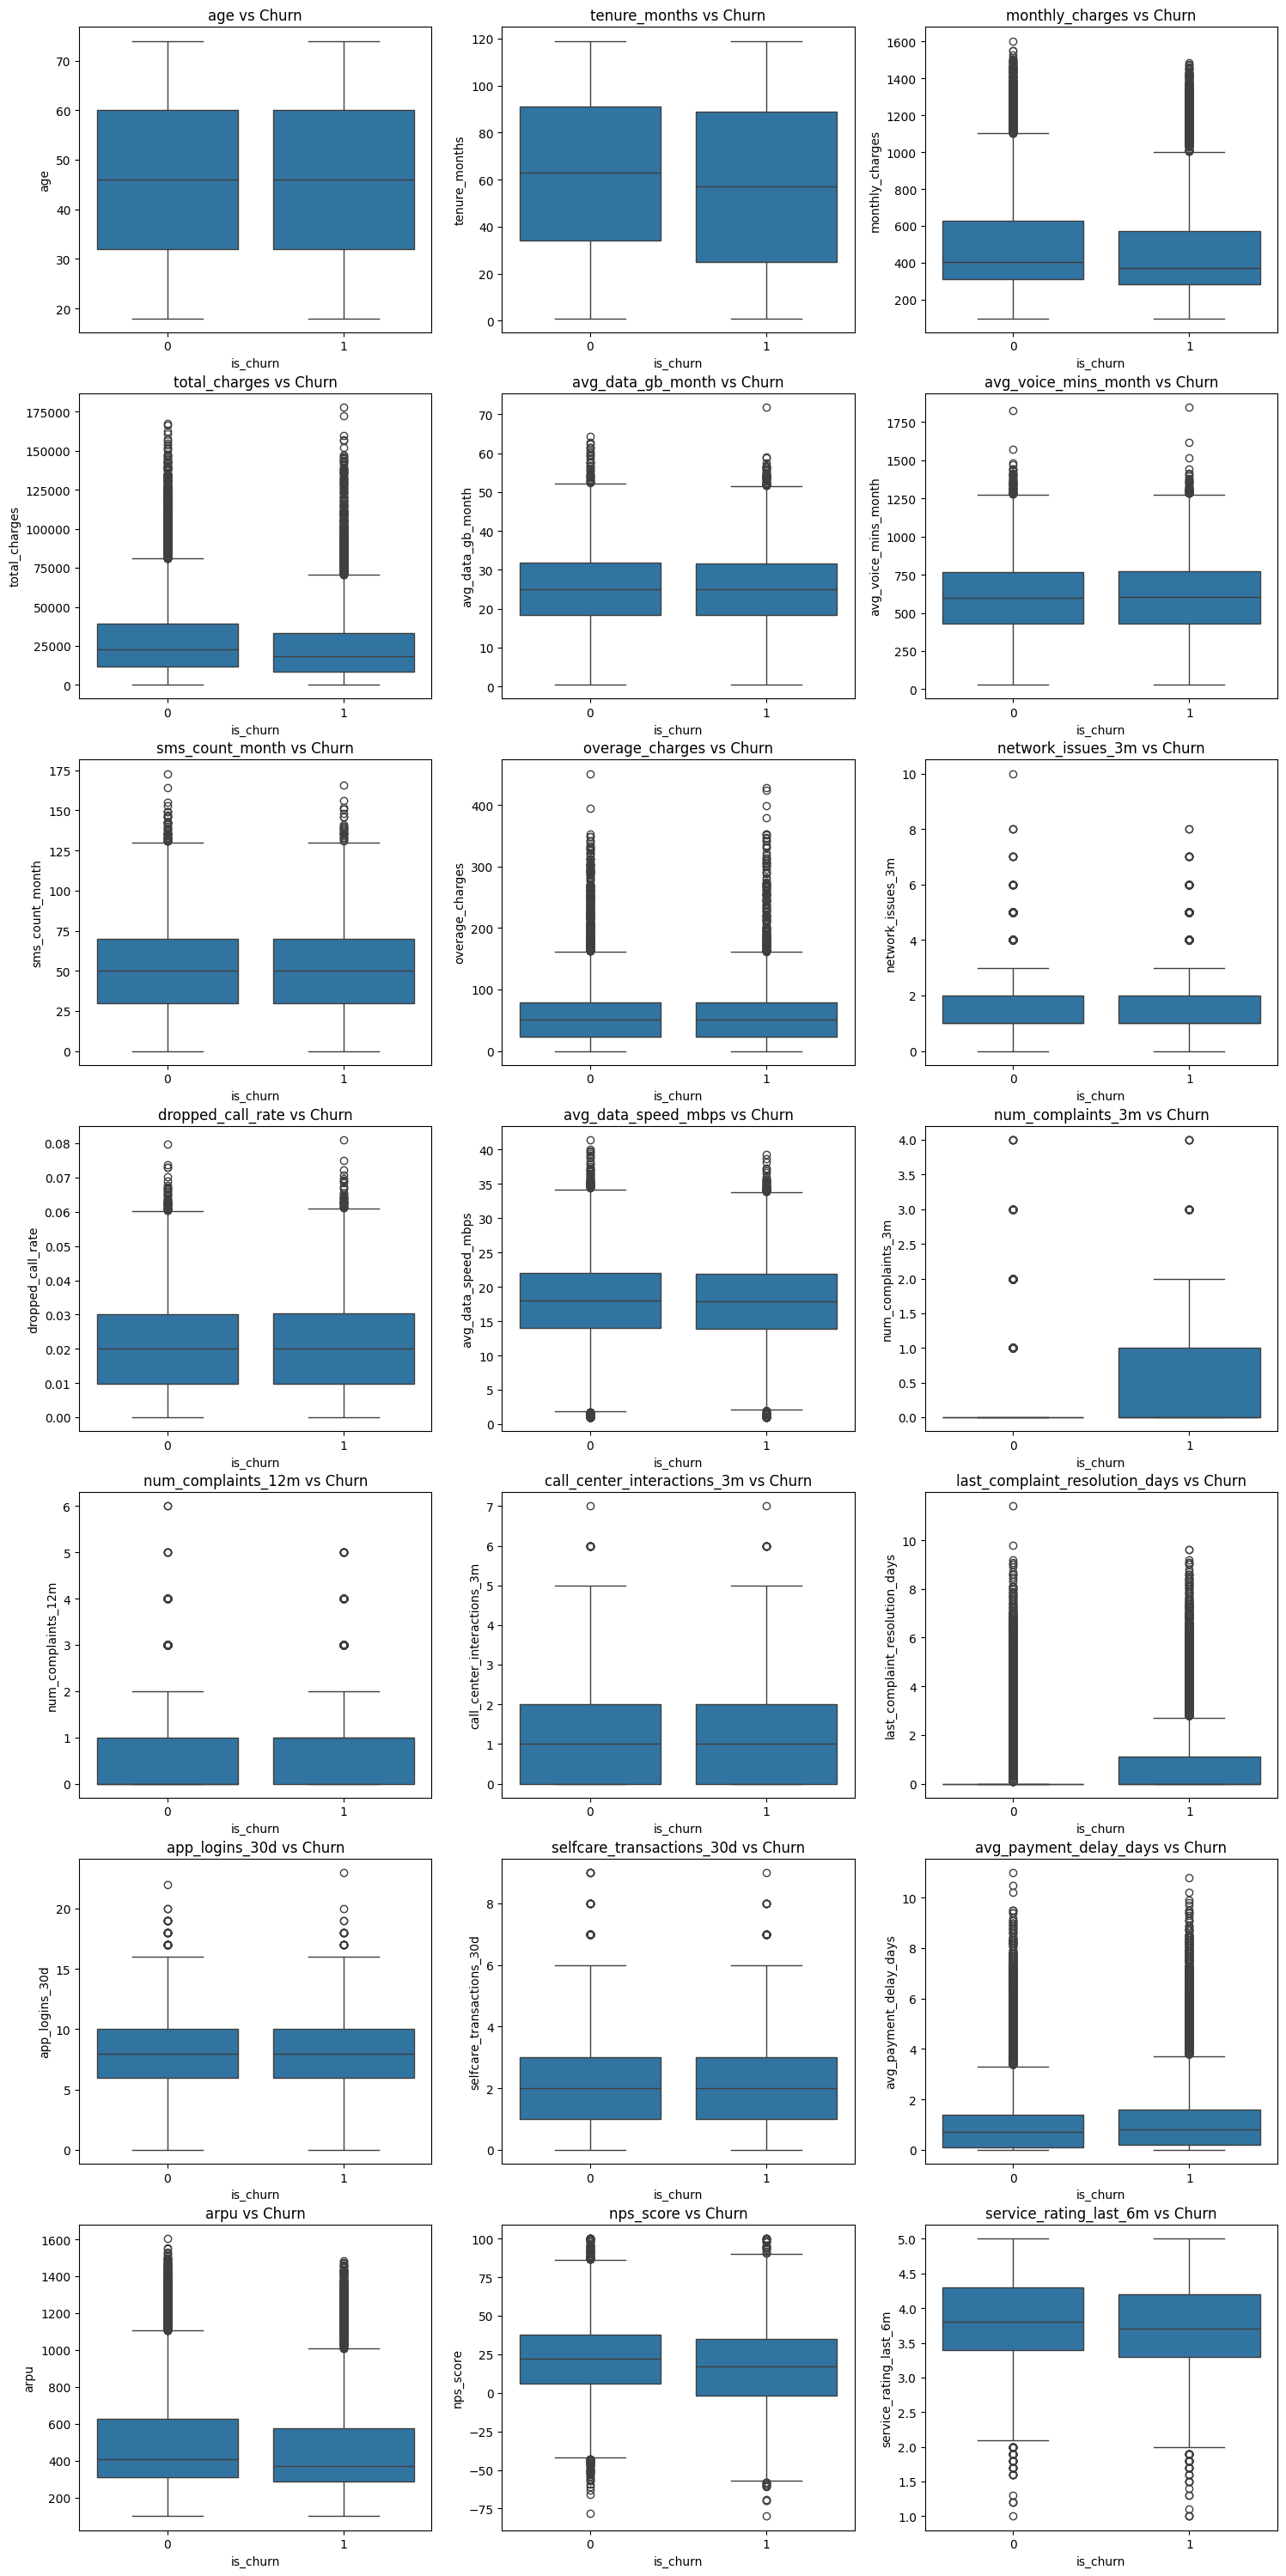

In [16]:
# Box Plots for numerical colunmns which are not binary
plt.figure(figsize=(18, 60))
num_non_binary_cols = [col for col in numerical_cols if col not in Binar and col != 'is_churn']
for i, col in enumerate(num_non_binary_cols, start=1):
    plt.subplot(11, 3, i)
    sns.boxplot(data=df, x='is_churn', y=col)
    plt.title(col+' vs Churn')
    

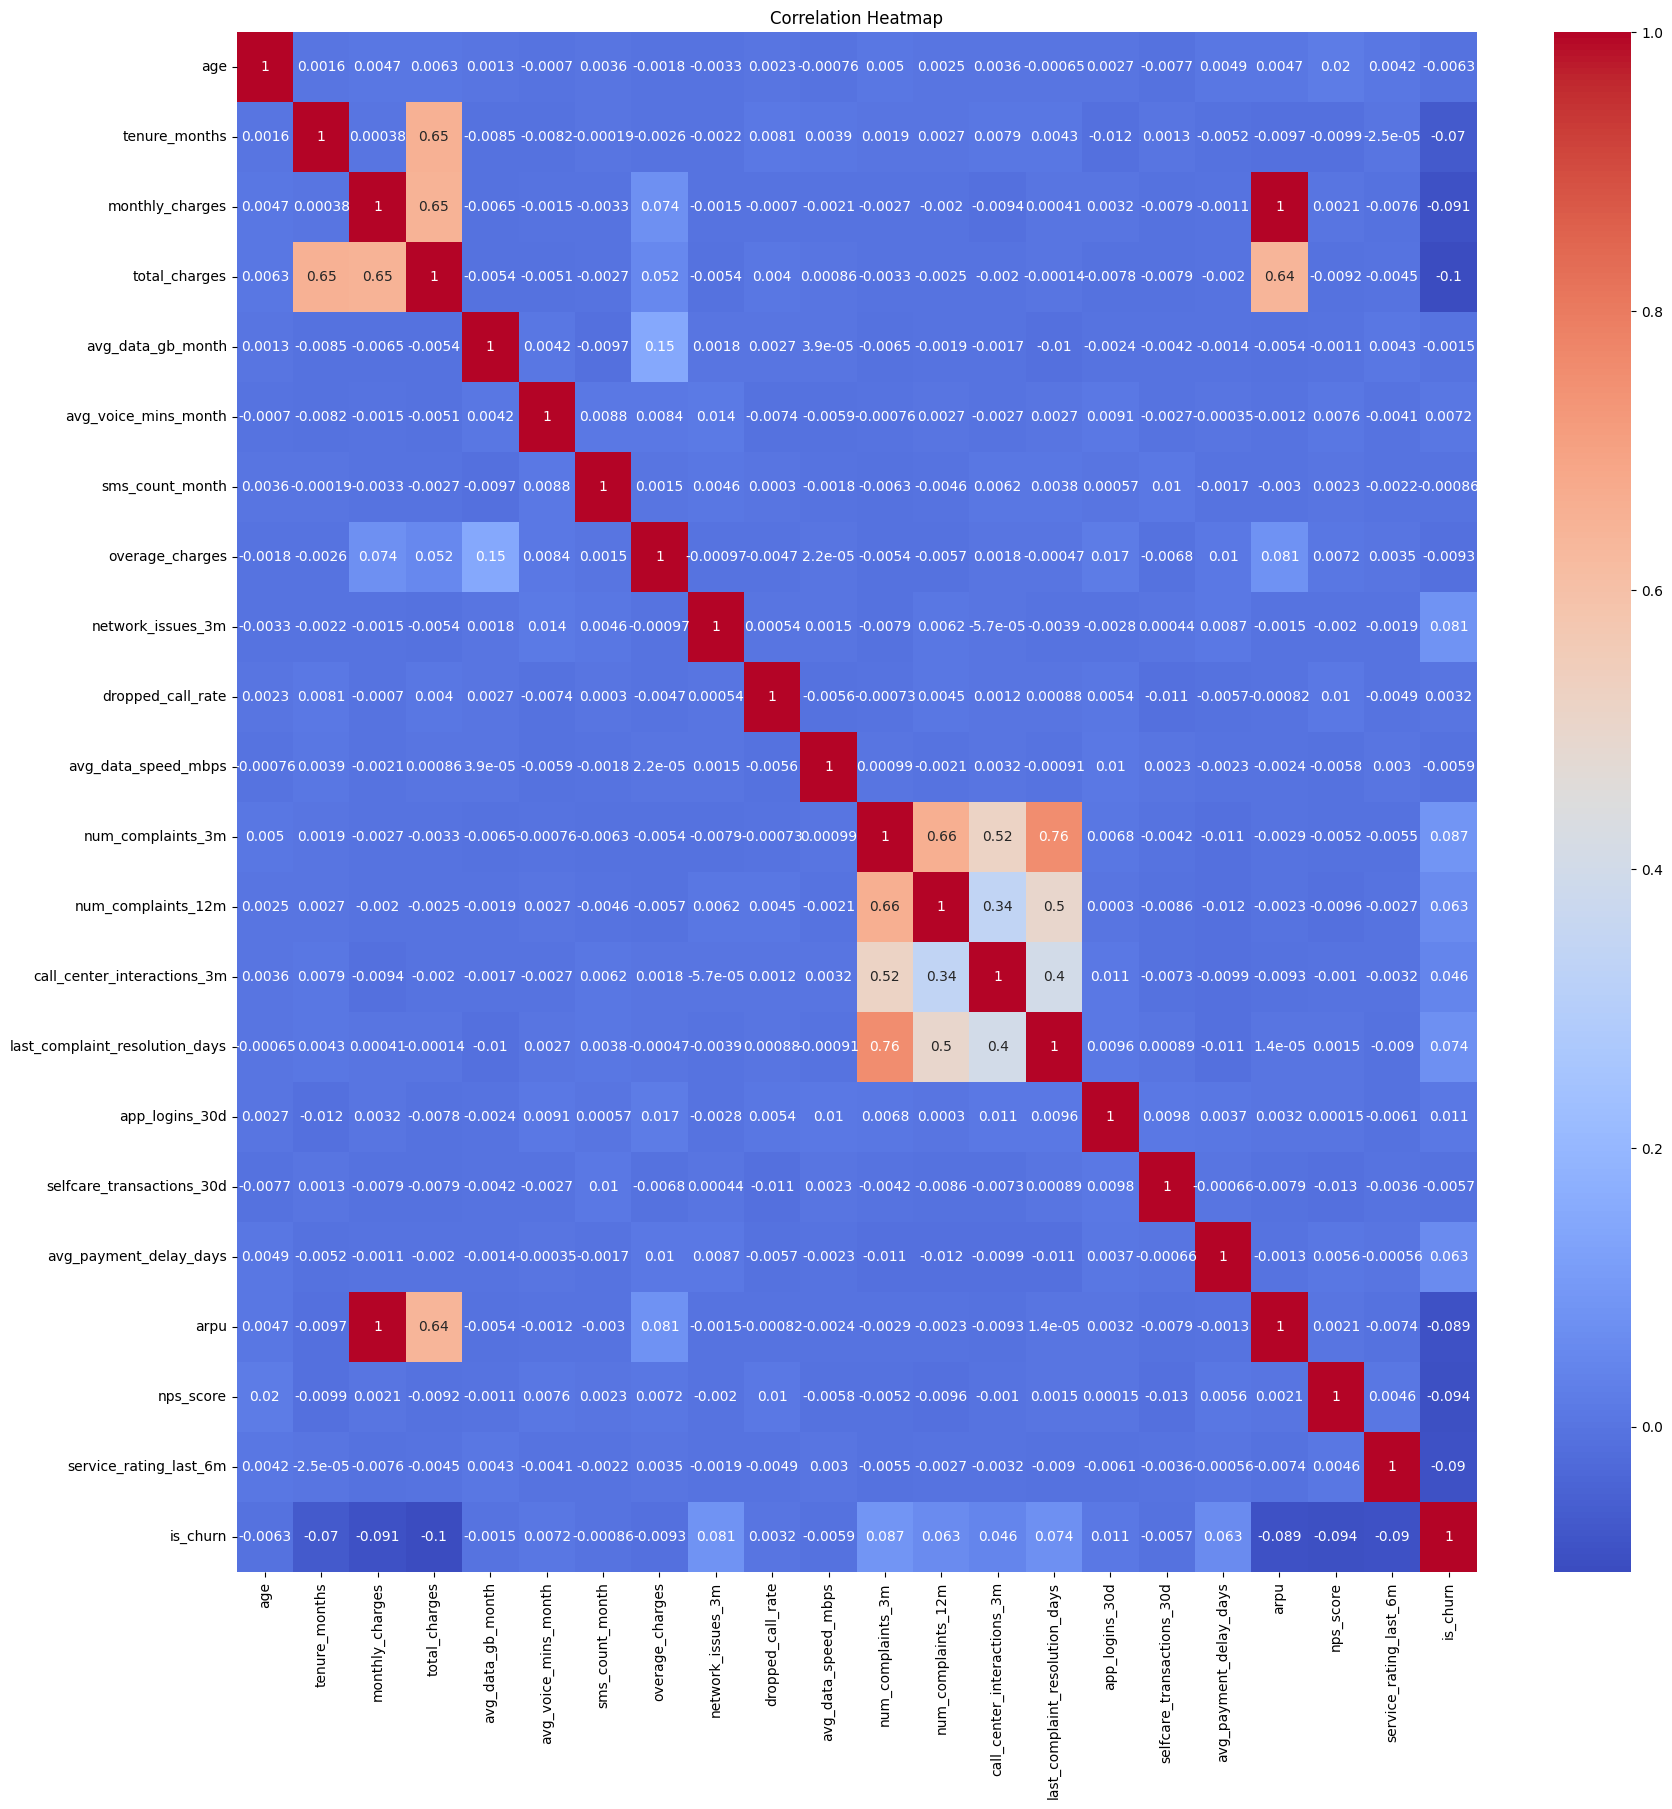

In [17]:
# Corelation Heatmap

plt.figure(figsize=(20,20))
dataC= df[[col for col in numerical_cols if col not in Binar]]
graphC = dataC.corr()
sns.heatmap(graphC, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [18]:
#checking if there is any new customer 
# new users have billing and churn behavior differs and may impact feature engineering and model stability
print("new customers = ",(df['tenure_months'] == 0).sum())

new customers =  0


In [19]:
# High overage behavior flag
# as Higher overage → dissatisfaction → churn risk
df['high_overage_flag'] = (
    df['overage_charges'] > df['overage_charges'].quantile(0.90)
).astype(int)


# Soft cap numeric outliers (because these high outliers => lower churn)
cap_cols = ['avg_data_speed_mbps','avg_data_gb_month']

for col in cap_cols:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)


# High value customers of company 
df['high_value_customer'] = (df['arpu'] > df['arpu'].quantile(0.75)).astype(int)


In [20]:
complain = df['num_complaints_3m'] > df['num_complaints_12m']
print(complain.value_counts())
# there is no sustomer where num_complaints_12m is less than num_complaints_3m

False    25000
Name: count, dtype: int64


In [21]:
drop_cols = [
    'monthly_charges',
    'num_complaints_3m',
    'total_charges'
]

df = df.drop(columns=drop_cols)


In [22]:
# checking different values of each column in cacategorical_cols
for each in categorical_cols:
    print("Entries in column-", each)
    print("No. of unique values- ", df[each].nunique())
    print(df[each].unique())
    print("---"*15)

Entries in column- gender
No. of unique values-  3
['Female' 'Male' 'Other']
---------------------------------------------
Entries in column- region_circle
No. of unique values-  5
['West' 'South' 'North' 'East' 'Metro']
---------------------------------------------
Entries in column- connection_type
No. of unique values-  3
['4G' '5G' 'Fiber Home Broadband']
---------------------------------------------
Entries in column- plan_type
No. of unique values-  2
['Postpaid' 'Prepaid']
---------------------------------------------
Entries in column- contract_type
No. of unique values-  4
['2 Year' 'No Contract' 'Month-to-Month' '1 Year']
---------------------------------------------
Entries in column- base_plan_category
No. of unique values-  6
['Postpaid Platinum' 'Prepaid Unlimited' 'Prepaid Regular' 'Prepaid Mini'
 'Postpaid Silver' 'Postpaid Gold']
---------------------------------------------
Entries in column- segment_value
No. of unique values-  3
['High' 'Medium' 'Low']
-------------

## One-hot encoding (Data Preparation)

In [23]:
# one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)
df_encoded.head()

,age,tenure_months,avg_data_gb_month,avg_voice_mins_month,sms_count_month,overage_charges,is_family_plan,is_multi_service,network_issues_3m,dropped_call_rate,...,contract_type_2 Year,contract_type_Month-to-Month,contract_type_No Contract,base_plan_category_Postpaid Platinum,base_plan_category_Postpaid Silver,base_plan_category_Prepaid Mini,base_plan_category_Prepaid Regular,base_plan_category_Prepaid Unlimited,segment_value_Low,segment_value_Medium
0,23,84,10.6900,453.0,102.0,0.00,1,0,1,0.035772,...,1,0,0,1,0,0,0,0,0,0
1,72,32,34.6500,797.0,29.0,169.54,0,1,3,0.015473,...,0,0,1,0,0,0,0,1,0,1
2,47,119,5.2200,687.0,73.0,0.74,0,0,1,0.028856,...,0,0,1,0,0,0,1,0,1,0
3,74,73,24.4900,232.0,0.0,78.21,1,0,0,0.033661,...,0,0,1,0,0,1,0,0,1,0
4,41,92,48.1102,450.0,35.0,75.60,0,0,5,0.013339,...,0,0,1,0,0,0,1,0,1,0


## Train-Test Split

In [24]:
# Train-Test Split

X = df_encoded.drop('is_churn', axis=1)
y = df_encoded['is_churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Modeling

In [25]:
# Baseline Model (Unscaled Logistic Regression) - Training Model

lr_unscaled  = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_unscaled .fit(X_train, y_train)



#Making predicstion on Test
pred_test=lr_unscaled.predict(X_test)
#Evaluate classifier on Test
print("Performance on Test Data:")
EvaluateClassifier(y_test,pred_test)

print("---"*20)

#Making predicstion on Train
pred_train = lr_unscaled.predict(X_train)
#Evaluate classifier on Train
print("Performance on Train Data:")
EvaluateClassifier(y_train,pred_train)



Performance on Test Data:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      2929
           1       0.52      0.58      0.55      2071

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.61      0.60      0.61      5000

------------------------------------------------------------
Performance on Train Data:
              precision    recall  f1-score   support

           0       0.69      0.61      0.64     11714
           1       0.52      0.61      0.56      8286

    accuracy                           0.61     20000
   macro avg       0.60      0.61      0.60     20000
weighted avg       0.62      0.61      0.61     20000



In [26]:
# Main Model (Random Forest)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)


#Making predicstion on Test
pred=rf.predict(X_test)
#Evaluate classifier on Test
print("Performance on Test Data:")
EvaluateClassifier(y_test,pred)

print("---"*20)

#Making predicstion on Train
pred_train = rf.predict(X_train)
#Evaluate classifier on Train
print("Performance on Train Data:")
EvaluateClassifier(y_train,pred_train)

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      2929
           1       0.53      0.57      0.55      2071

    accuracy                           0.61      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.61      0.61      0.61      5000

------------------------------------------------------------
Performance on Train Data:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     11714
           1       0.66      0.71      0.69      8286

    accuracy                           0.73     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.73      0.73      0.73     20000



In [27]:
# XGBoost (Advanced Model)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


#Making predicstion on Test
pred=xgb.predict(X_test)
#Evaluate classifier on Test
print("Performance on Test Data:")
EvaluateClassifier(y_test,pred)

print("---"*20)

#Making predicstion on Train
pred_train = xgb.predict(X_train)
#Evaluate classifier on Train
print("Performance on Train Data:")
EvaluateClassifier(y_train,pred_train)

Performance on Test Data:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2929
           1       0.52      0.54      0.53      2071

    accuracy                           0.61      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.61      0.61      0.61      5000

------------------------------------------------------------
Performance on Train Data:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     11714
           1       0.76      0.79      0.78      8286

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [28]:
# probabilities

# Logistic Regression probabilities (Unscaled data) 
lr_unscaled_probs  = lr_unscaled.predict_proba(X_test)[:, 1]

# Random Forest probabilities
rf_probs = rf.predict_proba(X_test)[:, 1]

# XGBoost probabilities
xgb_probs = xgb.predict_proba(X_test)[:, 1]



results = pd.DataFrame({
    'Model': ['Logistic Regression (unscaled)', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [
        roc_auc_score(y_test, lr_unscaled_probs),
        roc_auc_score(y_test, rf_probs),
        roc_auc_score(y_test, xgb_probs)
    ]
})

results 

,Model,ROC-AUC
0,Logistic Regression (unscaled),0.647326
1,Random Forest,0.647614
2,XGBoost,0.635404


In [29]:
#XGBoost- Hyperparameter Tuning

# Hyperparameter Grid
param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3]
}


# Randomized Search with CV
search = RandomizedSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best CV ROC-AUC:", search.best_score_)


# Final Model Training
xgb_tuned = search.best_estimator_
xgb_tuned.fit(X_train, y_train)

# Test Set Evaluation
xgb_tuned_probs = xgb_tuned.predict_proba(X_test)[:, 1]

print("XGBoost Tuned Test ROC-AUC:", roc_auc_score(y_test, xgb_tuned_probs))


#Making predicstion on Test
pred=xgb_tuned.predict(X_test)
#Evaluate classifier on Test
print("Performance on Test Data:")
EvaluateClassifier(y_test,pred)

print("---"*20)

#Making predicstion on Train
pred_train = xgb_tuned.predict(X_train)
#Evaluate classifier on Train
print("Performance on Train Data:")
EvaluateClassifier(y_train,pred_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best CV ROC-AUC: 0.6635090544922199
XGBoost Tuned Test ROC-AUC: 0.6544667545560396
Performance on Test Data:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73      2929
           1       0.61      0.37      0.46      2071

    accuracy                           0.64      5000
   macro avg       0.63      0.60      0.60      5000
weighted avg       0.64      0.64      0.62      5000

------------------------------------------------------------
Performance on Train Data:
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     11714
           1       0.64      0.40      0.49      8286

    accuracy                           0.66     20000
   macro avg       0.66      0.62      0.62     20000
weighted av

## Feature scaling (To check for Logistic regression)

In [30]:
#Feature scaling (Usingf StandardScaler)

numerical_cols = df_encoded.select_dtypes(include='number').columns.tolist()

num_non_binary_cols = [col for col in numerical_cols if col not in Binar]
df_scaled=df_encoded
scaler = StandardScaler()
df_scaled[num_non_binary_cols] = scaler.fit_transform(df_scaled[num_non_binary_cols])
df_scaled.head()


,age,tenure_months,avg_data_gb_month,avg_voice_mins_month,sms_count_month,overage_charges,is_family_plan,is_multi_service,network_issues_3m,dropped_call_rate,...,contract_type_2 Year,contract_type_Month-to-Month,contract_type_No Contract,base_plan_category_Postpaid Platinum,base_plan_category_Postpaid Silver,base_plan_category_Prepaid Mini,base_plan_category_Prepaid Regular,base_plan_category_Prepaid Unlimited,segment_value_Low,segment_value_Medium
0,-1.399919,0.693848,-1.466159,-0.601747,1.798681,-1.265506,1,0,-0.400011,1.092906,...,5.717755,-0.474162,-1.530732,3.946929,-0.367243,-0.516512,-0.734122,-0.403607,-1.050978,-0.740262
1,1.587687,-0.818919,0.976647,0.785771,-0.758499,2.620685,0,1,1.242474,-0.375002,...,-0.174894,-0.474162,0.653282,-0.253362,-0.367243,-0.516512,-0.734122,2.477656,-1.050978,1.350873
2,0.063398,1.712057,-2.023845,0.342088,0.782815,-1.248544,0,0,-0.400011,0.592776,...,-0.174894,-0.474162,0.653282,-0.253362,-0.367243,-0.516512,1.362171,-0.403607,0.951495,-0.740262
3,1.709630,0.373840,-0.059201,-1.493146,-1.774365,0.527221,1,0,-1.221253,0.940284,...,-0.174894,-0.474162,0.653282,-0.253362,-0.367243,1.936063,-0.734122,-0.403607,0.951495,-0.740262
4,-0.302431,0.926582,2.348961,-0.613847,-0.548320,0.467395,0,0,2.884959,-0.529273,...,-0.174894,-0.474162,0.653282,-0.253362,-0.367243,-0.516512,1.362171,-0.403607,0.951495,-0.740262


In [31]:
df_scaled['is_churn'] = df['is_churn']


In [32]:
# spliting after scaling features
X = df_scaled.drop('is_churn', axis=1)
y = df_scaled['is_churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

lr_scaled  = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_scaled .fit(X_train, y_train)

# Logistic Regression probabilities (scaled data) 
lr_scaled_probs  = lr_scaled.predict_proba(X_test)[:, 1]
print('Logistic Regression (scaled)- ROC-AUC: ',roc_auc_score(y_test, lr_scaled_probs))

Logistic Regression (scaled)- ROC-AUC:  0.6472338504101329


## Evaluation

In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression (unscaled)','Logistic Regression (scaled)', 'Random Forest', 'XGBoost (baseline)',
        'XGBoost (tuned)'],
    'ROC-AUC': [
        roc_auc_score(y_test, lr_unscaled_probs),
        roc_auc_score(y_test, lr_scaled_probs),
        roc_auc_score(y_test, rf_probs),
        roc_auc_score(y_test, xgb_probs),
        roc_auc_score(y_test, xgb_tuned_probs)
    ]
})

results

,Model,ROC-AUC
0,Logistic Regression (unscaled),0.647326
1,Logistic Regression (scaled),0.647234
2,Random Forest,0.647614
3,XGBoost (baseline),0.635404
4,XGBoost (tuned),0.654467


In [34]:
# Logistic Regression (scaled)
cv_lr_scaled = cross_val_score(
    lr_scaled,
    X_train,
    y_train,
    cv=5,
    scoring="roc_auc"
)

# Random Forest
cv_rf = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring="roc_auc"
)

# XGBoost (tuned)
cv_xgb_tuned = cross_val_score(
    xgb_tuned,
    X_train,
    y_train,
    cv=5,
    scoring="roc_auc"
)


In [35]:
# Cross Validation results table
results_cv = pd.DataFrame({
    'Model': [
        'LogReg (scaled)',
        'Random Forest',
        'XGBoost (tuned)'
    ],
    'ROC-AUC (CV Mean)': [
        cv_lr_scaled.mean(),
        cv_rf.mean(),
        cv_xgb_tuned.mean()
    ]
})

results_cv


,Model,ROC-AUC (CV Mean)
0,LogReg (scaled),0.644654
1,Random Forest,0.649720
2,XGBoost (tuned),0.663341


## Model Selection and Saving the model 
I selected XGBoost as the primary model due to its highest cross-validation and test ROC-AUC,

In [36]:
#Save the model

import pickle

pickle.dump(xgb_tuned,open('model.pkl','wb')) 

dt_loaded=pickle.load(open('model.pkl','rb'))

Retention Recommendations

For Prepaid / No-Contract Customers

    Offer discounts to move to 1-Year or 2-Year plans
    Improve network quality in high-issue areas
    Send payment reminders and offer flexible payment options
    Resolve complaints faster and follow up
    Provide personalized value bundles based on usage


For High-Value Customers

    Counter competitor offers with better deals
    Provide priority support or a dedicated account manager
    Offer premium benefits and faster service


For Long-Term Customers

    Run loyalty and reward programs
    Give referral incentives
    Offer upgrades based on usage patterns
    Do annual feedback and support check-ins
